# Load HADs and UKCP datasets using python

In [1]:
# need to be in the clim-recal root director
import os

os.chdir("../")

In [2]:
import matplotlib.pyplot as plt

# importing the python functions to load data
from python.load_data.data_loader import load_data

## Loader function

We have a function that loads and concatenates all data available (with extension .nc or .tif) in a input directory for a given variable. The data is sliced by a time rage provided, and if provided uses a shapefile to crop the image into a smaller dataset. 

## HADs data

We have mounted the vmfileshare fileshare containing all data. We will load the HADs data first.

In [3]:
# difining variables for loader
scotland_shapefile = "data/Scotland/Scotland.bbox.shp"
date_period = ("1980-01-01", "2000-01-01")
variable = "tasmax"

In [ ]:
input_files = (
    "/Volumes/vmfileshare/ClimateData/Processed/HadsUKgrid/resampled_2.2km/tasmax/day"
)

# data loader
hads = load_data(
    input_files,
    date_range=date_period,
    variable=variable,
    shapefile_path=scotland_shapefile,
)

Look at resuting xarray:

In [5]:
print(hads)

<xarray.Dataset>
Dimensions:                  (time: 7306, projection_y_coordinate: 304,
                              projection_x_coordinate: 211)
Coordinates:
  * time                     (time) datetime64[ns] 1980-01-01T12:00:00 ... 20...
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
  * projection_x_coordinate  (projection_x_coordinate) float64 7.519e+03 ... ...
  * projection_y_coordinate  (projection_y_coordinate) float64 1.198e+06 ... ...
    transverse_mercator      int64 0
Data variables:
    tasmax                   (time, projection_y_coordinate, projection_x_coordinate) float64 ...


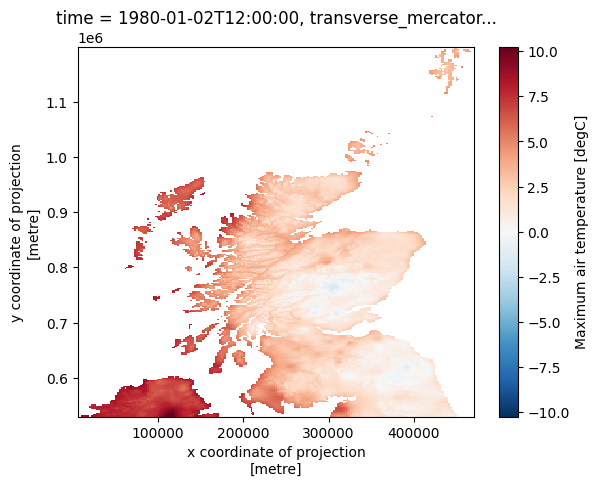

In [7]:
hads["tasmax"].isel(time=1).plot()

## UKCP data

Now we load the tif files of the UKCP data that has been reprojected to the BNG grid.


In [6]:
# if extension is .tif file we should specify it in the inputs (default is .nc)
input_files = "/Volumes/vmfileshare/ClimateData/Reprojected/UKCP2.2/tasmax/01/latest"
ext = "tif"
ukcp = load_data(
    input_files,
    date_range=date_period,
    variable=variable,
    shapefile_path=scotland_shapefile,
    extension=ext,
)

File: data/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_19821201-19831130.tif is needs rasterio library, trying...
File: data/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_19831201-19841130.tif is needs rasterio library, trying...
File: data/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.tif is needs rasterio library, trying...
File: data/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_19811201-19821130.tif is needs rasterio library, trying...


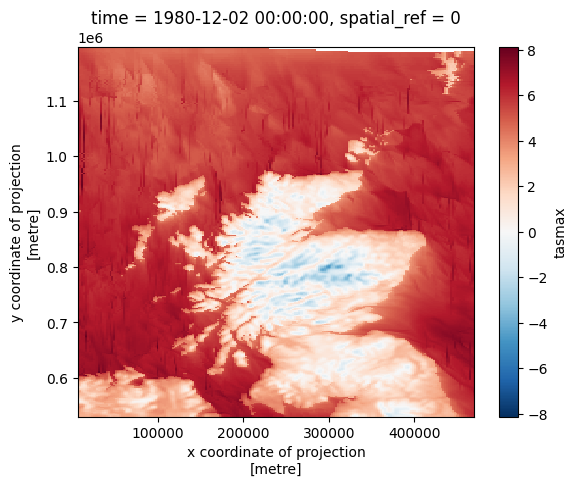

In [8]:
ukcp.where(ukcp["tasmax"] < 1000)["tasmax"].isel(time=1).plot()

## Time series


Plotting time series to make sure data has been loaded correctly and makes sense.

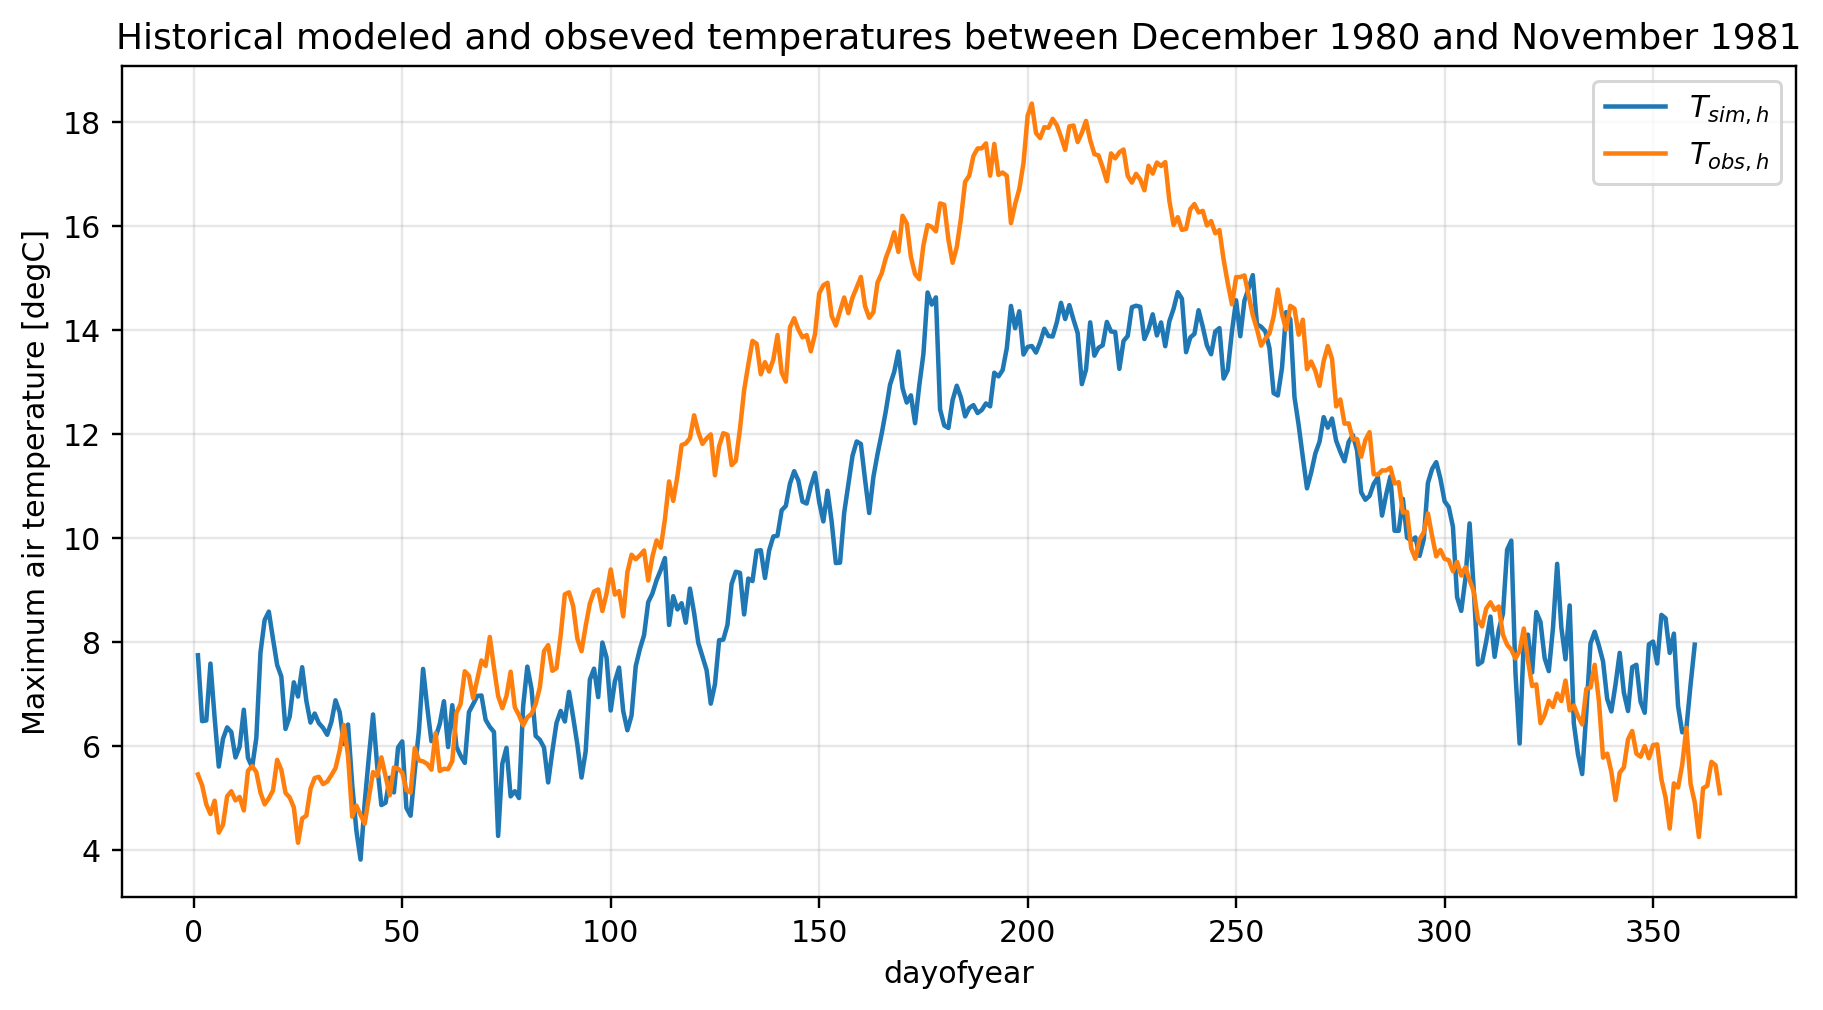

In [11]:
plt.figure(figsize=(10, 5), dpi=216)
ukcp.where(ukcp["tasmax"] < 1000)["tasmax"].groupby("time.dayofyear").mean(...).plot(
    label="$T_{sim,h}$"
)
hads["tasmax"].groupby("time.dayofyear").mean(...).plot(label="$T_{obs,h}$")
# simp['tasmax'].groupby('time.dayofyear').mean(...).plot(label='$T_{sim,p}$')

plt.title(
    "Historical modeled and obseved temperatures between December 1980 and November 1981"
)  # ; and predicted temperatures')
plt.gca().grid(alpha=0.3)
plt.legend();